In [4]:
import numpy as np
import pandas as pd
import jieba
import bz2
from gensim.models import KeyedVectors
import os
import re

In [5]:
#显示所有列
pd.set_option('display.max_columns', None)
#显示所有行
pd.set_option('display.max_rows', None)
#设置value的显示长度为100，默认为50
pd.set_option('max_colwidth',100)

In [6]:
dir = '../data/zju'
filenames = os.listdir(dir)
dfs = []
index = 1
for name in filenames:
    print(name)
    dfs.append(pd.read_excel(os.path.join(dir, name))[['内容', '态度（1-10）打分']])
df = pd.concat(dfs)
df.head()

3190100860.xlsx
3190102585.xlsx
3180103833.xlsx
3180105325.xlsx
3170104035.xlsx
3190105774.xlsx
3190102617.xlsx
3190101852.xlsx
3180105833.xlsx
3190102068.xlsx
3180100368.xlsx
3180102566.xlsx
3190105973.xlsx
3190100692.xlsx
3160102936.xlsx
3190104855.xlsx
3180106125.xlsx
3170101161.xlsx
3180105610.xlsx
3180104999.xlsx
3180105918.xlsx
3180104096.xlsx
3170104494.xlsx
11616077.xlsx
3190101477.xlsx
3170106011.xlsx
3180102293.xlsx
3190104951.xlsx
3180104580.xlsx
3180101677.xlsx
3180102871.xlsx
3180101678.xlsx
3180103075.xlsx
3190100547.xlsx
3180102499.xlsx
3190102389.xlsx
3189901004.xlsx
3190100747.xlsx
3170100445.xlsx
3160100367.xlsx
3180100963.xlsx
3170104215 .xlsx
3160105291.xlsx
11927088.xlsx
3180101329.xlsx
3180104796.xlsx
3180101287.xlsx
21933022.xlsx
3180103878.xlsx
3170101421.xlsx
3190103786.xlsx
3190102410.xlsx
3190101982.xlsx
3190101239.xlsx
3180106341.xlsx
3170103396.xlsx
3180105714.xlsx
3170101904.xlsx
3180101175.xlsx
3180103736.xlsx
3190106325.xlsx
3180104650.xlsx
3170100893.xl

3170101388.xlsx
3190104446.xlsx
3170105872.xlsx
3170101950.xlsx
3170102913.xlsx
3180104195.xlsx
3180103119.xlsx
3180101037.xlsx
3160101329.xlsx
3190102982.xlsx
3190103351.xlsx
3150102639.xlsx
3190104221.xlsx
3180103001.xlsx
3180103220.xlsx
3190104460.xlsx
3170100717.xlsx
3190101896.xlsx
3180100215.xlsx
3180103442.xlsx
3190104929.xlsx
3190100480.xlsx
3180105588.xlsx
3189901008.xlsx
3180101419.xlsx
3170102439.xlsx
3160103155.xlsx
3180104974.xlsx
3170103110.xlsx
3160103472.xlsx
3180103594.xlsx
3180103753.xlsx
3190103353.xlsx
3170103081.xlsx
3160100800.xlsx
3180102405.xlsx
3170100772.xlsx
3170103821.xlsx
11616025.xlsx
3160105387.xlsx
3180102049.xlsx
3180100773.xlsx
3170102664.xlsx
3190102793.xlsx
3160100732.xlsx
3190100268.xlsx
3190104429.xlsx
3190103550.xlsx
3170104029.xlsx
3180100487.xlsx
3190105379.xlsx
3180102227.xlsx
3170105575.xlsx
3190104307.xlsx
3170104449.xlsx
3160102652.xlsx
3170103603.xlsx
3180106022.xlsx
3190102884.xlsx
3180105434.xlsx
3190101959.xlsx
3180104225.xlsx
3180103760

,内容,态度（1-10）打分
0,NaN,NaN
1,NaN,NaN
2,就事论事 就人论人\n上升群体的睿智发言都给爷爬！！,4
3,快来玩儿！,7
4,在长沙的点点滴滴！\n好懒好懒的我\n终于在今天\n把所有照片用了统一滤镜调了一下\n决定还是发出来纪念一下嗷！\n茶颜太好喝了呜呜呜呜！！\n茶颜万岁！下次还来！！,8


In [7]:
df = df.dropna()

In [8]:
df.columns = ['comment', 'attitude']

In [9]:
df.head()

,comment,attitude
2,就事论事 就人论人\n上升群体的睿智发言都给爷爬！！,4
3,快来玩儿！,7
4,在长沙的点点滴滴！\n好懒好懒的我\n终于在今天\n把所有照片用了统一滤镜调了一下\n决定还是发出来纪念一下嗷！\n茶颜太好喝了呜呜呜呜！！\n茶颜万岁！下次还来！！,8
5,大家都好会写！！,7
6,时隔一个月多的出门嘎嘎嘎！开心子！,8


In [10]:
emoji_pattern = re.compile(u'['
        u'\U0001F300-\U0001F64F'
        u'\U0001F680-\U0001F6FF'
        u'\ud000-\udfff'
        u'\u2600-\u2B55]+',
        re.UNICODE)

In [11]:
def word_cut(content):
    if pd.isnull(content):
        return None
    content = re.sub("[\s+\.\!\/_,$%^*(+\"\'\]\[\]\{\}]+|[+——！，。？、～~@#￥%……&*（）]+", "",str(content))
    content = re.sub(emoji_pattern, "",content)
    return content

df['cut'] = df.comment.apply(word_cut)

In [12]:
df.head()

,comment,attitude,cut
2,就事论事 就人论人\n上升群体的睿智发言都给爷爬！！,4,就事论事就人论人上升群体的睿智发言都给爷爬
3,快来玩儿！,7,快来玩儿
4,在长沙的点点滴滴！\n好懒好懒的我\n终于在今天\n把所有照片用了统一滤镜调了一下\n决定还是发出来纪念一下嗷！\n茶颜太好喝了呜呜呜呜！！\n茶颜万岁！下次还来！！,8,在长沙的点点滴滴好懒好懒的我终于在今天把所有照片用了统一滤镜调了一下决定还是发出来纪念一下嗷茶颜太好喝了呜呜呜呜茶颜万岁下次还来
5,大家都好会写！！,7,大家都好会写
6,时隔一个月多的出门嘎嘎嘎！开心子！,8,时隔一个月多的出门嘎嘎嘎开心子


In [13]:
df[df['cut']=='内容']
df = df.drop([61, 126, 124])

In [14]:
df[df['attitude']=='·10'] = 10

In [15]:
df.cut = df.cut.astype(str)
df.attitude = df.attitude.astype(np.int8)

In [54]:
cn_model = KeyedVectors.load_word2vec_format('../embedding/sgns.renmin.word', binary=False, unicode_errors="ignore")

In [84]:
train_text = df.cut.to_list()
train_tag = df.attitude.to_list()

In [85]:
print(len(train_text))
print(len(train_tag))

53377
53377


In [86]:
demension = cn_model['测试'].shape[0]

In [87]:
train_tokens = []
for text in train_text:
    # 结巴分词
    cut = jieba.cut(text)
    # 结巴分词的输出结果为一个生成器
    # 把生成器转换为list
    cut_list = [ i for i in cut ]
    for i, word in enumerate(cut_list):
        try:
            # 将词转换为索引index
            cut_list[i] = cn_model.vocab[word].index
        except KeyError:
            # 如果词不在字典中，则输出0
            cut_list[i] = 0
    train_tokens.append(cut_list)

In [88]:
num_tokens = [len(token) for token in train_tokens]
num_tokens = np.array(num_tokens)

In [89]:
np.mean(num_tokens)

18.458661970511642

In [90]:
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
max_tokens = int(max_tokens)
max_tokens = 85

In [91]:
# 取tokens的长度为98时，大约97%的样本被涵盖
# 我们对长度不足的进行padding，超长的进行修剪
np.sum( num_tokens < max_tokens ) / len(num_tokens)

0.9743709837570489

In [92]:
# 用来将tokens转换为文本
def reverse_tokens(tokens):
    text = ''
    for i in tokens:
        if i != 0:
            text = text + cn_model.index2word[i]
        else:
            text = text + ' '
    return text

In [93]:
reverse_tokens(train_tokens[300])

'虽然 过多少但是还得去康康奸笑'

In [94]:
# 只使用前20000个词
num_words = 100000
# 初始化embedding_matrix，之后在keras上进行应用
embedding_matrix = np.zeros((num_words, demension))
# embedding_matrix为一个 [num_words，embedding_dim] 的矩阵
# 维度为 50000 * 300
for i in range(num_words):
    embedding_matrix[i,:] = cn_model[cn_model.index2word[i]]
embedding_matrix = embedding_matrix.astype('float32')

In [95]:
# 检查index是否对应，
# 输出300意义为长度为300的embedding向量一一对应
np.sum(cn_model[cn_model.index2word[333]] == embedding_matrix[333] )

300

In [96]:
embedding_matrix.shape

(100000, 300)

In [97]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, GRU, Embedding, LSTM, Bidirectional
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau
import tensorflow as tf

In [98]:
# 进行padding和truncating， 输入的train_tokens是一个list
# 返回的train_pad是一个numpy array
train_pad = pad_sequences(train_tokens, maxlen=max_tokens, padding='pre', truncating='pre')

In [99]:
# 超出五万个词向量的词用0代替
train_pad[ train_pad>=num_words ] = 0

In [100]:
# 可见padding之后前面的tokens全变成0，文本在最后面
train_pad[31]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0, 45903, 45903, 29020,   166,   461,
        2109,     0,   461,     4,  1507, 21844,     0,     9,  4496,
       12831,  1351,  7107,     0], dtype=int32)

In [101]:
train_pad = np.array(train_pad)

In [102]:
# 进行训练和测试样本的分割
from sklearn.model_selection import train_test_split

In [103]:
# 90%的样本用来训练，剩余10%用来测试
X_train, X_test, y_train, y_test = train_test_split(train_pad,
                                                    train_tag,
                                                    test_size=0.1,
                                                    random_state=12)

In [104]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [105]:
# 查看训练样本，确认无误
print(reverse_tokens(X_train[100]))
print('class: ',y_train[100])

                                                                 说好的胡萝卜和 呢捂脸红薯和粥是我另买的不是送的)
class:  4


In [106]:
def bina(arr):
    for i in range(len(arr)):
        if arr[i] <= 3:
            arr[i] = 0
        elif arr[i] > 3 and arr[i] <= 6:
            arr[i] = 1
        elif arr[i] > 6: 
            arr[i] = 2

In [107]:
bina(y_train)

In [108]:
bina(y_test)

In [109]:
y_train = tf.one_hot(y_train, 3)

In [110]:
y_test = tf.one_hot(y_test, 3)

In [111]:
y_train

<tf.Tensor: shape=(48039, 3), dtype=float32, numpy=
array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)>

In [119]:
model = Sequential()
model.add(Embedding(num_words,
                   demension,
                   weights=[embedding_matrix],
                   input_length = max_tokens,
                   trainable = False))
model.add(Bidirectional(LSTM(units=32, return_sequences=True)))
model.add(LSTM(units=16, return_sequences=False))
#model.add(Dense(16))

In [120]:
model.add(Dense(3, activation='sigmoid'))
#model.add(tf.keras.layers.Softmax())
# 我们使用adam以0.001的learning rate进行优化
optimizer = Adam(lr=1e-3)

In [121]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 85, 300)           30000000  
_________________________________________________________________
bidirectional_1 (Bidirection (None, 85, 64)            85248     
_________________________________________________________________
lstm_3 (LSTM)                (None, 16)                5184      
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 51        
Total params: 30,090,483
Trainable params: 90,483
Non-trainable params: 30,000,000
_________________________________________________________________


In [122]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [123]:
# 建立一个权重的存储点
path_checkpoint = '../checkpoints/check.keras'
checkpoint = ModelCheckpoint(filepath=path_checkpoint, monitor='val_loss',
                                      verbose=1, save_weights_only=True,
                                      save_best_only=True)

In [ ]:
# 尝试加载已训练模型
try:
    model.load_weights(path_checkpoint)
except Exception as e:
    print(e)

In [124]:
# 定义early stoping如果5个epoch内validation loss没有改善则停止训练
earlystopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

In [125]:
# 自动降低learning rate
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.1, min_lr=1e-8, patience=0, verbose=1)

In [126]:
# 定义callback函数
callbacks = [
    earlystopping, 
    checkpoint,
    lr_reduction
]

In [710]:
history = model.fit(X_train, y_train,
          validation_split=0.1, 
          epochs=80,
          batch_size=256,
          callbacks=callbacks)

Epoch 1/80
167/169 [============================>.] - ETA: 0s - loss: 0.8771 - accuracy: 0.5402
Epoch 00001: val_loss did not improve from 0.80449
169/169 [==============================] - 4s 23ms/step - loss: 0.8766 - accuracy: 0.5409 - val_loss: 0.8418 - val_accuracy: 0.5704 - lr: 0.0010
Epoch 2/80
169/169 [==============================] - ETA: 0s - loss: 0.8226 - accuracy: 0.5889
Epoch 00002: val_loss did not improve from 0.80449
169/169 [==============================] - 3s 17ms/step - loss: 0.8226 - accuracy: 0.5889 - val_loss: 0.8246 - val_accuracy: 0.5806 - lr: 0.0010
Epoch 3/80
169/169 [==============================] - ETA: 0s - loss: 0.8054 - accuracy: 0.5991
Epoch 00003: val_loss did not improve from 0.80449
169/169 [==============================] - 3s 17ms/step - loss: 0.8054 - accuracy: 0.5991 - val_loss: 0.8132 - val_accuracy: 0.5918 - lr: 0.0010
Epoch 4/80
169/169 [==============================] - ETA: 0s - loss: 0.7957 - accuracy: 0.6037
Epoch 00004: val_loss did no

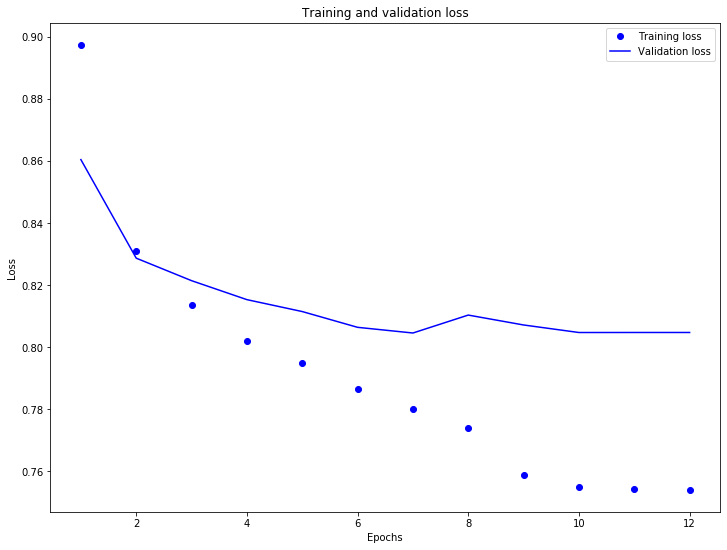

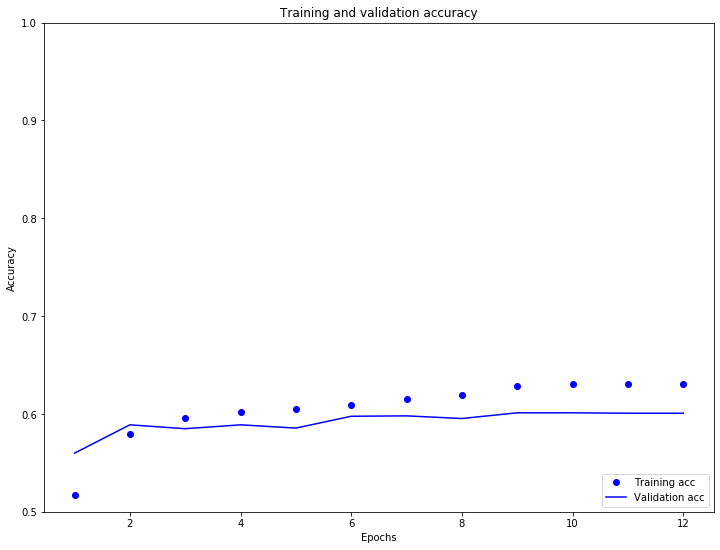

In [585]:
import matplotlib.pyplot as plt

history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss=history_dict['loss']
val_loss=history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,9))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim((0.5,1))
plt.show()

In [129]:
model2 = Sequential([
    tf.keras.layers.Embedding(num_words,
                   demension,
                   weights=[embedding_matrix],
                   input_length = max_tokens,
                   trainable = False),
    tf.keras.layers.SimpleRNN(units=64, return_sequences=False),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='sigmoid'),
])


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 85, 300)           30000000  
_________________________________________________________________
bidirectional_1 (Bidirection (None, 85, 64)            85248     
_________________________________________________________________
lstm_3 (LSTM)                (None, 16)                5184      
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 51        
Total params: 30,090,483
Trainable params: 90,483
Non-trainable params: 30,000,000
_________________________________________________________________


In [131]:

model2.summary()
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])




Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 85, 300)           30000000  
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 64)                23360     
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 195       
Total params: 30,027,715
Trainable params: 27,715
Non-trainable params: 30,000,000
_________________________________________________________________


In [132]:
model2.fit(X_train, y_train, epochs=20, validation_split=0.1, batch_size=256, callbacks=callbacks)

Epoch 1/20
169/169 [==============================] - ETA: 0s - loss: 0.8711 - accuracy: 0.5322
Epoch 00001: val_loss improved from inf to 0.85381, saving model to ../checkpoints/check.keras
169/169 [==============================] - 7s 41ms/step - loss: 0.8711 - accuracy: 0.5322 - val_loss: 0.8538 - val_accuracy: 0.5516 - lr: 0.0010
Epoch 2/20
169/169 [==============================] - ETA: 0s - loss: 0.8197 - accuracy: 0.5851
Epoch 00002: val_loss improved from 0.85381 to 0.82612, saving model to ../checkpoints/check.keras
169/169 [==============================] - 7s 40ms/step - loss: 0.8197 - accuracy: 0.5851 - val_loss: 0.8261 - val_accuracy: 0.5883 - lr: 0.0010
Epoch 3/20
169/169 [==============================] - ETA: 0s - loss: 0.8057 - accuracy: 0.5971
Epoch 00003: val_loss improved from 0.82612 to 0.81963, saving model to ../checkpoints/check.keras
169/169 [==============================] - 7s 41ms/step - loss: 0.8057 - accuracy: 0.5971 - val_loss: 0.8196 - val_accuracy: 0.58

In [144]:
 df = df.drop('comment', axis=1)

In [145]:
df.to_csv('../zju.csv')

In [147]:
df[df['attitude']==10]

,attitude,cut
13,10,先去1岁等待大宝贝啦新一岁还要选择滚烫的人生特别感谢wls真挚的贺信以及【又是学太极的一天嘻】
23,10,真滴是太棒辽夸
27,10,哈哈哈哈哈我也觉得自己可棒了bushi19年的最后一个月无论面对什么ddl都要这么刚鸭
34,10,十八年人生最晚归的一天致我最爱的你们
43,10,我小猫咪谁都不服大理寺日志最后一集的制作真的太绝了不枉这半个月的等待泪从画面到节奏都足够惊艳真的太爱了啊啊啊啊啊啊啊啊​​​
58,10,我今天值得了​​​
70,10,今天又是为祖国母亲骄傲的一天幸福并感激着ps纪念我与大宝贝一起看的第一部电影​​
85,10,悬帨之辰春和景明十八又一岁不淹兮愿岁岁常相见生日快乐大宝贝又是一如既往超级爱你的一年爱心
103,10,收到了来自大宝贝的贺电一时间感动的无以言表大哭十二年的鼓励与陪伴在我心中你值得人间的一切美好
107,10,终于如愿以偿去到钱江内心全程：哇这个好厉害哇――那个好高大上以及hg的保安小哥果然都非常的nice和友好星星
